In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from collections import namedtuple

In [2]:
# Navigate to project route
if not os.getcwd().endswith('/show-us-the-data'):
    os.chdir('../..')
os.getcwd()

'/Users/pscl/Development/Projects/show-us-the-data'

In [3]:
res_path = 'models/SciBERT_Finetuned_All'

In [4]:
# Read metrics from storage

metrics = []
mdict = dict()
for ep in range(1,10+1):
    filename = f'SciBERT_Finetuned_{ep}Eps/metrics.json'
    with open(os.path.join(res_path,filename), 'r') as f:
        dec_json = json.load(f)
        metrics.append(dec_json)
        mdict[ep] = dec_json

In [5]:
# Print example
metrics[0]

{'ent_type': {'correct': 12925,
  'incorrect': 0,
  'partial': 0,
  'missed': 287,
  'spurious': 4919,
  'possible': 13212,
  'actual': 17844,
  'precision': 0.7243331091683479,
  'recall': 0.9782773236451711,
  'f1': 0.8323673364245234},
 'partial': {'correct': 12915,
  'incorrect': 0,
  'partial': 10,
  'missed': 287,
  'spurious': 4919,
  'possible': 13212,
  'actual': 17844,
  'precision': 0.7240529029365613,
  'recall': 0.9778988798062368,
  'f1': 0.8320453374549202},
 'strict': {'correct': 12915,
  'incorrect': 10,
  'partial': 0,
  'missed': 287,
  'spurious': 4919,
  'possible': 13212,
  'actual': 17844,
  'precision': 0.7237726967047747,
  'recall': 0.9775204359673024,
  'f1': 0.8317233384853169},
 'exact': {'correct': 12915,
  'incorrect': 10,
  'partial': 0,
  'missed': 287,
  'spurious': 4919,
  'possible': 13212,
  'actual': 17844,
  'precision': 0.7237726967047747,
  'recall': 0.9775204359673024,
  'f1': 0.8317233384853169},
 'ordinary': {'accuracy': 0.9973686062457324,
 

In [6]:
df = pd.DataFrame(columns=['epoch', 'type', 'metric', 'value'])
dfOrd = pd.DataFrame(columns=['epoch', 'accuracy','f1_B', 'f1_I', 'f1_O', 'submission'])

for i,m in enumerate(metrics):

    # Add the advanced metrics
    for mtype in ['strict', 'exact', 'partial', 'ent_type']:
        for metr in ['correct', 'incorrect', 'partial', 'missed','spurious','possible','actual','precision','recall','f1']:
            new_row = {
                'epoch': int(i+1), 
                'type': mtype, 
                'metric': metr, 
                'value': float(metrics[i][mtype][metr])
            }
            df = df.append(new_row, ignore_index=True)
            
    # Add the 'ordinary' metrics
    new_row = {
        'epoch': int(i)+1,
        'accuracy': metrics[i]['ordinary']['accuracy'],
        'f1_B': metrics[i]['ordinary']['f1_B'],
        'f1_I': metrics[i]['ordinary']['f1_I'],
        'f1_O': metrics[i]['ordinary']['f1_O'],
        'submission': metrics[i]['ordinary']['submission'],
        'typeIIError': int(metrics[i]['partial']['spurious']),
        'typeIIIError': int(metrics[i]['partial']['missed']),
        'typeVError': int(metrics[i]['partial']['partial']),
    }
    dfOrd = dfOrd.append(new_row, ignore_index=True)
            
df['epoch'] = df['epoch'].astype(int)
dfOrd['epoch'] = dfOrd['epoch'].astype(int)

In [7]:
dfOrd

,epoch,accuracy,f1_B,f1_I,f1_O,submission,typeIIError,typeIIIError,typeVError
0,1,0.997369,0.873150,0.837523,0.998696,0.430,4919.0,287.0,10.0
1,2,0.997258,0.888865,0.817561,0.998633,0.435,5266.0,137.0,18.0
2,3,0.997230,0.883201,0.819382,0.998621,0.439,5247.0,146.0,12.0
3,4,0.997041,0.851841,0.830217,0.998523,0.432,5341.0,238.0,6.0
4,5,0.997132,0.855286,0.835929,0.998568,0.438,5148.0,198.0,13.0
5,6,0.997914,0.931473,0.835504,0.998964,0.437,3889.0,319.0,8.0
6,7,0.997854,0.906152,0.853910,0.998934,0.433,4014.0,186.0,13.0
7,8,0.998847,0.956652,0.904520,0.999438,0.431,2065.0,255.0,15.0
8,9,0.998733,0.955552,0.893846,0.999377,0.435,2227.0,304.0,10.0
9,10,0.998452,0.951928,0.869244,0.999234,0.435,2792.0,307.0,8.0


In [91]:
# Plotting Hyperparams
PlotArguments = namedtuple('PlotArguments', (
    'label_font',
    'title_font',
    'suptitle_size',
    'tick_size',
    'legend_fontsize',
    'boxplot_width',
))

pltargs = PlotArguments(
    label_font = {
        'size' : 22,
        'weight' : 'normal'
    },
    title_font = {
        'size' : 24,
        'weight' : 'normal'
    },
    suptitle_size = 24,
    tick_size = 18,
    legend_fontsize = 18,
    boxplot_width=0.6
)

sb.set(style="ticks", rc={"lines.linewidth": 2.5})

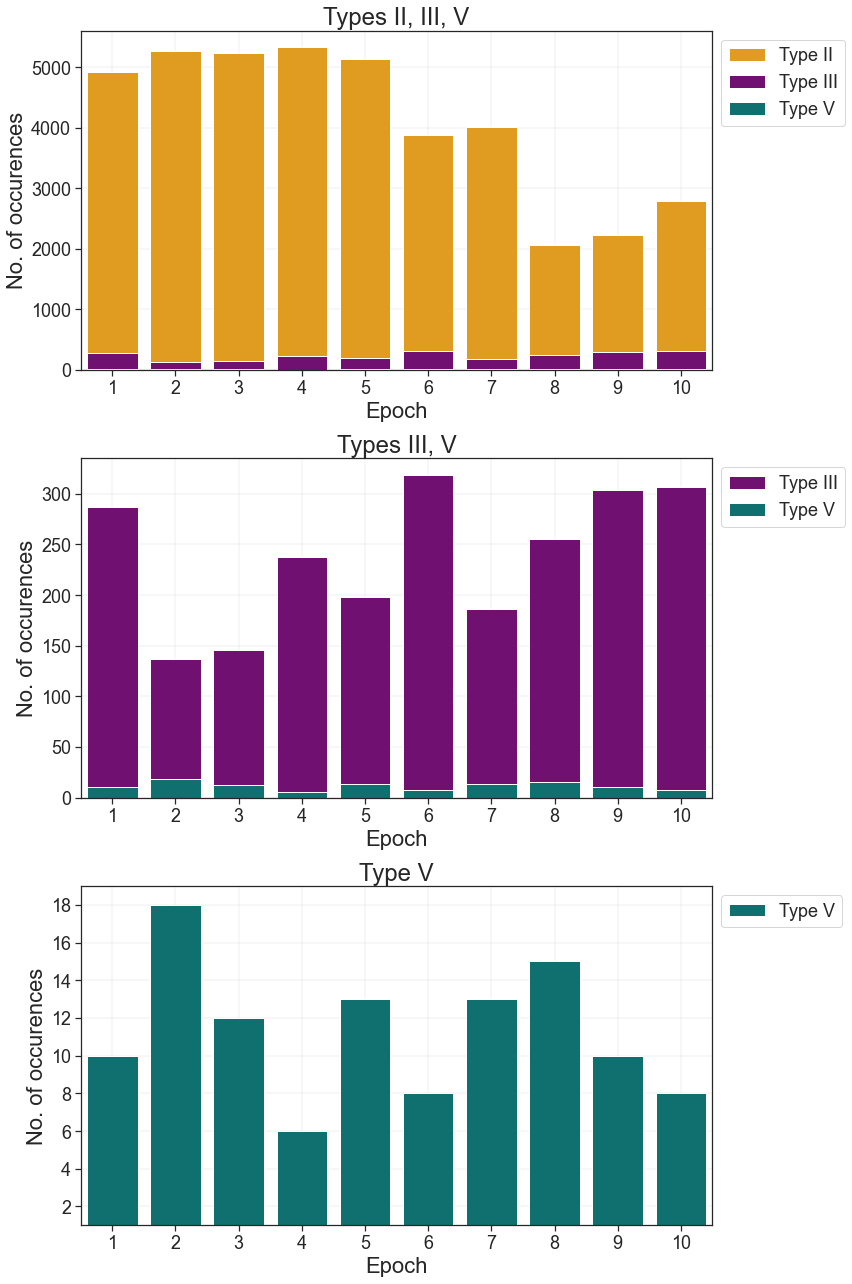

In [96]:
#sb.set_theme(style="whitegrid")

fig, axs = plt.subplots(3,1,figsize=(12,18))
#fig.suptitle('Types of errors', fontsize=pltargs.suptitle_size)
bbox = (1, 1)
legend_loc = 'upper left'

axs[0].set_title('Types II, III, V', fontdict=pltargs.title_font)

sb.barplot(x='epoch', y='typeIIError', data=dfOrd,ax=axs[0], color='orange', label='Type II')
sb.barplot(x='epoch', y='typeIIIError', data=dfOrd, ax=axs[0], color='purple', label='Type III')
sb.barplot(x='epoch', y='typeVError', data=dfOrd, ax=axs[0], color='teal', label='Type V')

axs[0].tick_params(axis = 'both', which = 'major', labelsize = pltargs.tick_size)
axs[0].tick_params(axis = 'both', which = 'minor', labelsize = pltargs.tick_size)
axs[0].set_ylabel('No. of occurences', fontdict=pltargs.label_font)
axs[0].set_xlabel('Epoch', fontdict=pltargs.label_font)
axs[0].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
axs[0].legend(bbox_to_anchor=bbox, loc=legend_loc, fontsize=pltargs.legend_fontsize)

axs[1].set_title('Types III, V', fontdict=pltargs.title_font)

sb.barplot(x='epoch', y='typeIIIError', data=dfOrd, ax=axs[1], color='purple', label='Type III')
sb.barplot(x='epoch', y='typeVError', data=dfOrd, ax=axs[1], color='teal', label='Type V')

#axs[1].set_ylim(0, 400)
axs[1].tick_params(axis = 'both', which = 'major', labelsize = pltargs.tick_size)
axs[1].tick_params(axis = 'both', which = 'minor', labelsize = pltargs.tick_size)
axs[1].set_ylabel('No. of occurences', fontdict=pltargs.label_font)
axs[1].set_xlabel('Epoch', fontdict=pltargs.label_font)
axs[1].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
axs[1].legend(bbox_to_anchor=bbox, loc=legend_loc, fontsize=pltargs.legend_fontsize)

axs[2].set_title('Type V', fontdict=pltargs.title_font)

sb.barplot(x='epoch', y='typeVError', data=dfOrd, ax=axs[2], color='teal', label='Type V')

axs[2].set_ylim(1,19)
axs[2].tick_params(axis = 'both', which = 'major', labelsize = pltargs.tick_size)
axs[2].tick_params(axis = 'both', which = 'minor', labelsize = pltargs.tick_size)
axs[2].set_ylabel('No. of occurences', fontdict=pltargs.label_font)
axs[2].set_xlabel('Epoch', fontdict=pltargs.label_font)
axs[2].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
axs[2].legend(bbox_to_anchor=bbox, loc=legend_loc, fontsize=pltargs.legend_fontsize)

plt.tight_layout()

plt.savefig('vis/scibert-error-types.pdf', bbox_inches='tight')

plt.show()

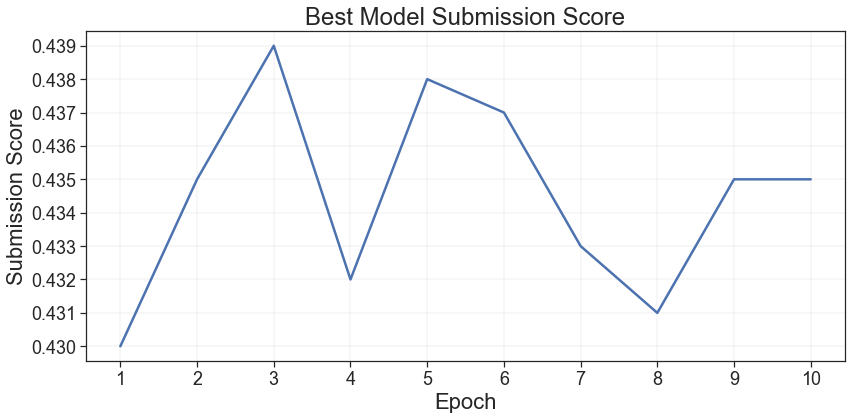

In [93]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title('Best Model Submission Score', fontsize=pltargs.suptitle_size)

sb.lineplot(x="epoch", y="submission", data=dfOrd)

#ax.set_ylim(0.430, 0.439)
ax.set_yticks(np.arange(0.430, 0.439, 0.001))
ax.set_xticks(np.arange(1, 11))

ax.tick_params(axis = 'both', which = 'major', labelsize = pltargs.tick_size)
ax.tick_params(axis = 'both', which = 'minor', labelsize = pltargs.tick_size)

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_ylabel('Submission Score', fontdict=pltargs.label_font)
ax.set_xlabel('Epoch', fontdict=pltargs.label_font)

#plt.legend(fontsize=pltargs.legend_fontsize)

plt.tight_layout()

plt.savefig('vis/scibert-submission-epochs.pdf', bbox_inches='tight')

plt.show()

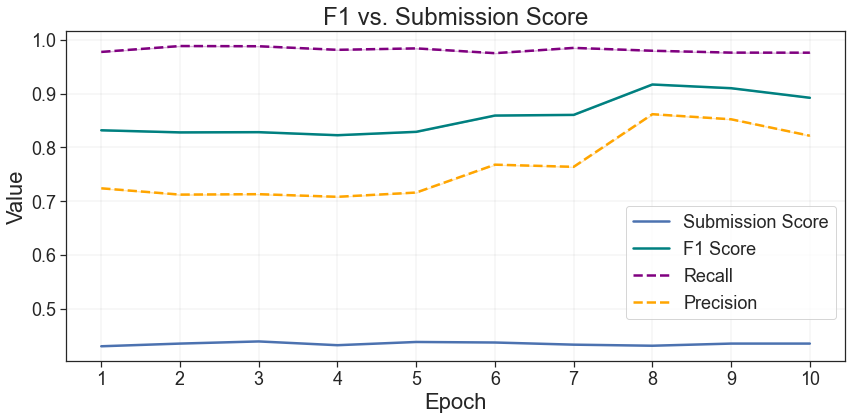

In [94]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title('F1 vs. Submission Score', fontsize=pltargs.suptitle_size)

sb.lineplot(x="epoch", y="submission", data=dfOrd, ax=ax, label='Submission Score')
sb.lineplot(x="epoch", y="value", data=df[(df.metric=='f1')], ax=ax, label='F1 Score', color='teal')
sb.lineplot(x="epoch", y="value", data=df[(df.metric=='recall')], ax=ax, label='Recall', color='purple', linestyle='--')
sb.lineplot(x="epoch", y="value", data=df[(df.metric=='precision')], ax=ax, label='Precision', color='orange', linestyle='--')

ax.set_xticks(np.arange(1, 11))

ax.tick_params(axis = 'both', which = 'major', labelsize = pltargs.tick_size)
ax.tick_params(axis = 'both', which = 'minor', labelsize = pltargs.tick_size)

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_ylabel('Value', fontdict=pltargs.label_font)
ax.set_xlabel('Epoch', fontdict=pltargs.label_font)

plt.legend(loc='lower right', bbox_to_anchor=(1,0.1), fontsize=pltargs.legend_fontsize)

plt.tight_layout()

plt.savefig('vis/scibert-f1-vs-submission.pdf', bbox_inches='tight')

plt.show()

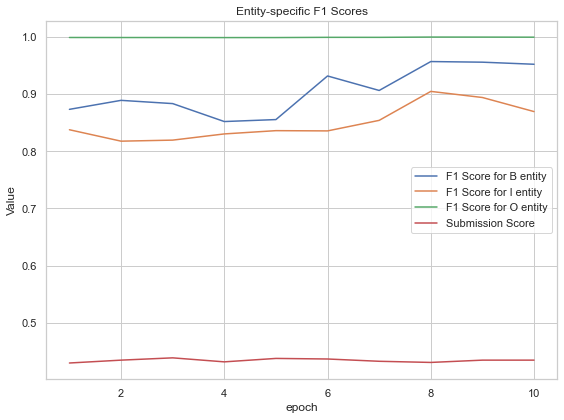

In [163]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.set_title('Entity-specific F1 Scores')
ax.set_ylabel('Value')
sb.lineplot(x="epoch", y="f1_B", data=dfOrd, ax=ax, label='F1 Score for B entity')
sb.lineplot(x="epoch", y="f1_I", data=dfOrd, ax=ax, label='F1 Score for I entity')
sb.lineplot(x="epoch", y="f1_O", data=dfOrd, ax=ax, label='F1 Score for O entity')
sb.lineplot(x="epoch", y="submission", data=dfOrd, ax=ax, label='Submission Score') 

plt.tight_layout()
plt.show()

In [34]:
df[(df.epoch==10)]

,epoch,type,metric,value


In [8]:
def normalize(l):
    """ Normalize to range [0.0, 1.0] """
    l_max = max(l)
    l_min = min(l)
    l = [(el - l_min) / (l_max - l_min) for el in l]
    return l

In [13]:
def read_metrics(keys, norm=False):
    """ Read metric denoted by keys over all epochs """
    m = [epoch_metrics[keys[0]][keys[1]] for epoch_metrics in metrics]
    if norm:
        m = normalize(m)
    return m

In [14]:
def read_ordinary_f1(norm=True):
    """ Read ordinary F1 as the average of the F1 scores
    corresponding to the B, I, and O tokens"""
    b = read_metrics(('ordinary','f1_B'), norm=False)
    i = read_metrics(('ordinary','f1_I'), norm=False)
    o = read_metrics(('ordinary','f1_O'), norm=False)
    f1 = [(_b*_i*_o)/3 for _b,_i,_o in zip(*[b,i,o])]
    if norm:
        f1 = normalize(f1)
    return f1

In [15]:
# Transform to epoch based format
submission_scores = read_metrics(('ordinary','submission'))
ordinary_f1_B = read_metrics(('ordinary','f1_B'))
ordinary_f1_I = read_metrics(('ordinary','f1_I'))
ordinary_f1_O = read_metrics(('ordinary','f1_O'))
ordinary_f1 = read_ordinary_f1()
adv_precision = read_metrics(('exact','precision'))
adv_recall = read_metrics(('exact','recall'))
adv_f1 = read_metrics(('exact','f1'))

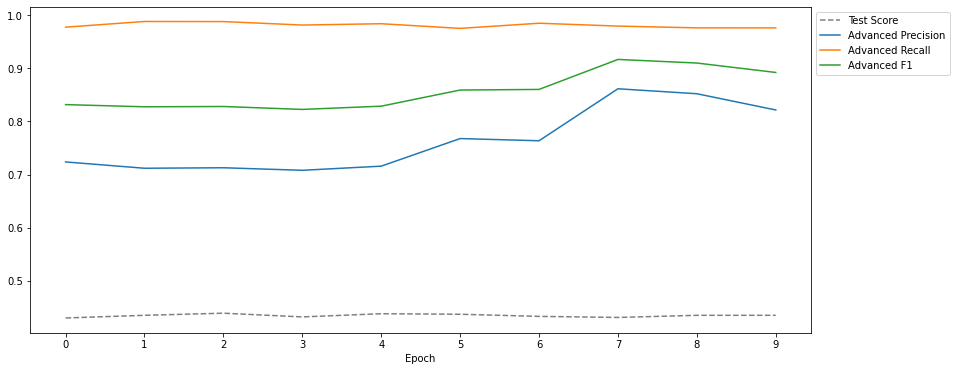

In [20]:
plt.figure(figsize=(14,6))
plt.plot(submission_scores, label='Test Score', linestyle='--', color='grey')
#plt.plot(ordinary_f1_B, label='Ordinary F1 B')
#plt.plot(ordinary_f1_I, label='Ordinary F1 I')
#plt.plot(ordinary_f1_O, label='Ordinary F1 O')
#plt.plot(ordinary_f1, label='Ordinary F1')
plt.plot(adv_precision, label='Advanced Precision')
plt.plot(adv_recall, label='Advanced Recall')
plt.plot(adv_f1, label='Advanced F1')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Epoch')
plt.xticks(range(10))
plt.show()

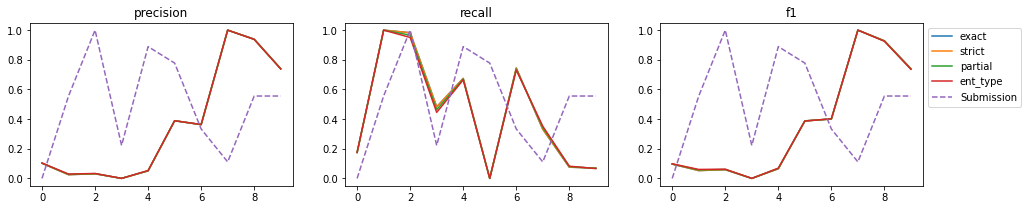

In [46]:
# Plot differences in types of advanced metrics
plt.figure(figsize=(16,3))
for i, metric_name in enumerate(['precision', 'recall', 'f1']):
    plt.subplot(1,3,i+1)
    plt.title(metric_name)
    for score_type in ['exact', 'strict', 'partial', 'ent_type']:
        metric = read_metrics((score_type, metric_name), norm=True)
        plt.plot(metric, label=score_type)
    plt.plot(read_metrics(('ordinary','submission'), norm=True), label='Submission', linestyle='--')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

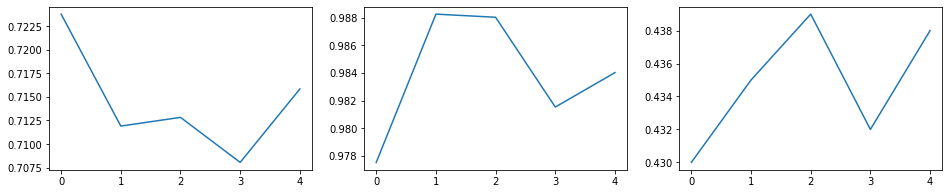

In [34]:
plt.figure(figsize=(16,3))

plt.subplot(131)
plt.plot(adv_precision, label='Advanced Precision')
plt.subplot(132)
plt.plot(adv_recall, label='Advanced Recall')
plt.subplot(133)
plt.plot(submission_scores, label='Test Score')
plt.show()